In [1]:
import pandas as pd

# EDA the dataset

In [2]:
df = pd.read_csv("personality_dataset.csv")
print(f"Length of the dataset: {len(df)}\n")
df.head()

Length of the dataset: 2900



,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,4.0,No,4.0,6.0,No,13.0,5.0,Extrovert
1,9.0,Yes,0.0,0.0,Yes,0.0,3.0,Introvert
2,9.0,Yes,1.0,2.0,Yes,5.0,2.0,Introvert
3,0.0,No,6.0,7.0,No,14.0,8.0,Extrovert
4,3.0,No,9.0,4.0,No,8.0,5.0,Extrovert


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2900 entries, 0 to 2899
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Time_spent_Alone           2837 non-null   float64
 1   Stage_fear                 2827 non-null   object 
 2   Social_event_attendance    2838 non-null   float64
 3   Going_outside              2834 non-null   float64
 4   Drained_after_socializing  2848 non-null   object 
 5   Friends_circle_size        2823 non-null   float64
 6   Post_frequency             2835 non-null   float64
 7   Personality                2900 non-null   object 
dtypes: float64(5), object(3)
memory usage: 181.4+ KB


## EDA numerical columns

In [4]:
num_cols = df.select_dtypes(exclude=['object']).columns
print(f"Numerical columns: {num_cols}")

Numerical columns: Index(['Time_spent_Alone', 'Social_event_attendance', 'Going_outside',
       'Friends_circle_size', 'Post_frequency'],
      dtype='object')


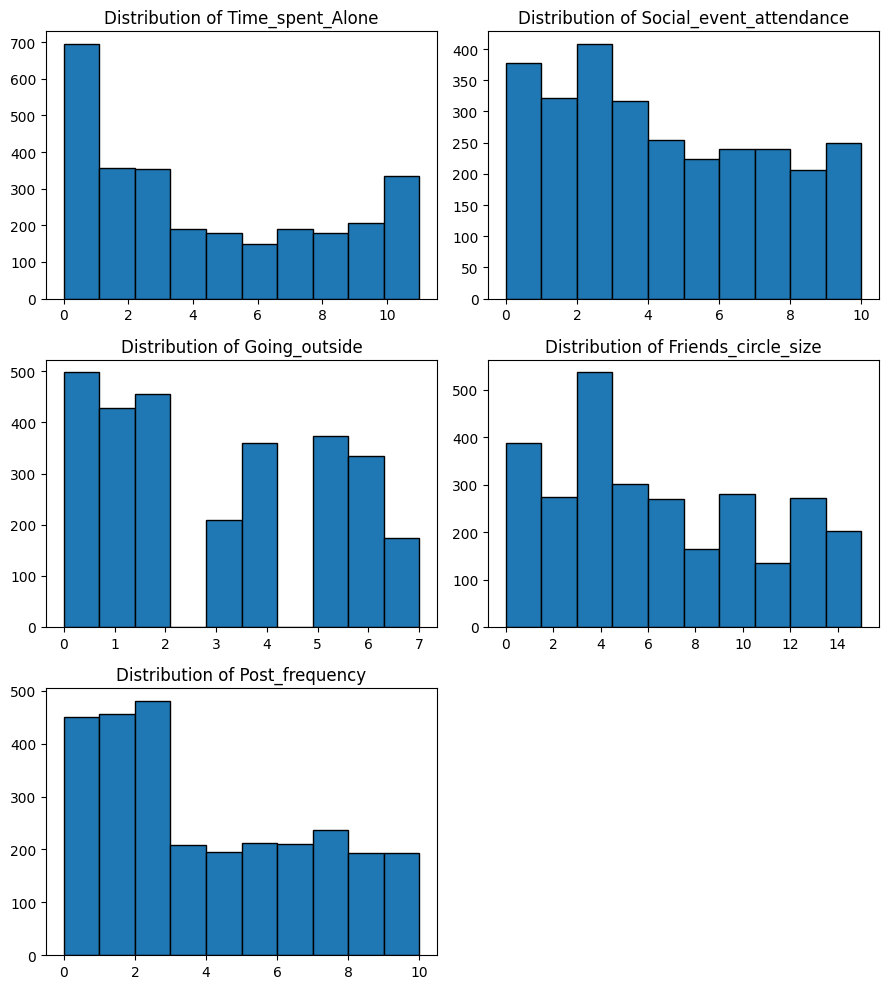

In [5]:
import matplotlib.pyplot as plt

plt.figure(figsize=(9,10))

for i, col in enumerate(num_cols):
    plt.subplot(3, 2, i + 1)
    plt.hist(df[col].dropna(), edgecolor='black')
    plt.title(f"Distribution of {col}")

plt.tight_layout()
plt.show()

In [6]:
# Some statistics
print("Descriptive statistics for numerical columns:\n")
for col in num_cols:
    print(f"Column: {col}")
    print(f"Column mean: {df[col].mean()}")
    print(f"Column median: {df[col].median()}\n")

Descriptive statistics for numerical columns:

Column: Time_spent_Alone
Column mean: 4.505816002819881
Column median: 4.0

Column: Social_event_attendance
Column mean: 3.963354474982382
Column median: 3.0

Column: Going_outside
Column mean: 3.0
Column median: 3.0

Column: Friends_circle_size
Column mean: 6.268862911795962
Column median: 5.0

Column: Post_frequency
Column mean: 3.564726631393298
Column median: 3.0



## EDA categorical columns

In [7]:
cat_cols = df.select_dtypes(include=['object']).columns
print(f"Categorical columns: {cat_cols}")

Categorical columns: Index(['Stage_fear', 'Drained_after_socializing', 'Personality'], dtype='object')


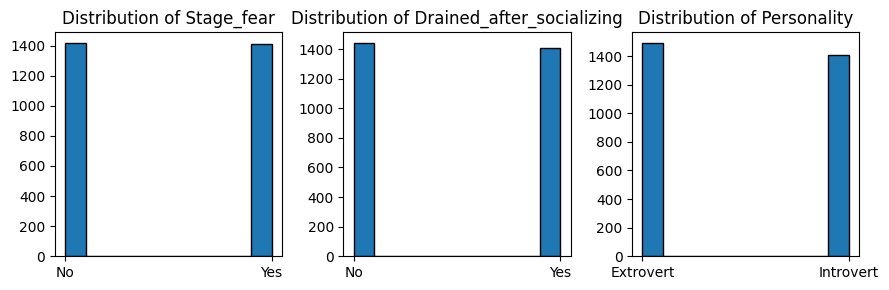

In [8]:
plt.figure(figsize=(9,3))

for i, col in enumerate(cat_cols):
    plt.subplot(1, 3, i + 1)
    plt.hist(df[col].dropna(), edgecolor='black')
    plt.title(f"Distribution of {col}")

plt.tight_layout()
plt.show()

## Fill missing values

In [9]:
# Count the number of missing values in each column
missing_values = df.isnull().sum()
print("Missing values in each column:\n")
print(missing_values[missing_values > 0])

Missing values in each column:

Time_spent_Alone             63
Stage_fear                   73
Social_event_attendance      62
Going_outside                66
Drained_after_socializing    52
Friends_circle_size          77
Post_frequency               65
dtype: int64


In [10]:
# Count the number of non-missing rows
non_missing_rows = df.dropna().shape[0]
print(f"Number of non-missing rows: {non_missing_rows}\n")
print(f"The ratio of non-missing rows to total rows: {non_missing_rows / len(df):.2f}\n")

Number of non-missing rows: 2477

The ratio of non-missing rows to total rows: 0.85



### Comments
- As the number of missing rows are large (15% of samples), removing all rows with missing values can cause significant information loss
- Instead, we'll try to fill missing values. From the distribution, we can see that values in all columns are distributed fairly evenly, and numerical columns have no outlier. Thus, filling numerical columns with mean values and categorical columns with mode values is a reasonable strategy

In [11]:
from sklearn.impute import SimpleImputer

df_fillna = df.copy()

# Impute missing values for numerical columns with the mean
imputer_num = SimpleImputer(strategy='mean')
df_fillna[num_cols] = imputer_num.fit_transform(df_fillna[num_cols])

# Impute missing values for categorical columns with the most frequent value
imputer_cat = SimpleImputer(strategy='most_frequent')
df_fillna[cat_cols] = imputer_cat.fit_transform(df_fillna[cat_cols])

# Verify that there are no more missing values
missing_values_after = df_fillna.isnull().sum()
print("Missing values after imputation:\n")
print(missing_values_after[missing_values_after > 0])

Missing values after imputation:

Series([], dtype: int64)


# Data conversion

## Encoding categorical data

In [12]:
bool2int = {
    "No": 0,
    "Yes": 1,
}

per2int = {
    "Introvert": 0,
    "Extrovert": 1,
}

In [13]:
df_encoded = df_fillna.copy()

# Encode boolean and personality columns
df_encoded['Stage_fear'] = df_encoded['Stage_fear'].map(bool2int)
df_encoded['Drained_after_socializing'] = df_encoded['Drained_after_socializing'].map(bool2int)
df_encoded['Personality'] = df_encoded['Personality'].map(per2int)

df_encoded.head()

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,4.0,0,4.0,6.0,0,13.0,5.0,1
1,9.0,1,0.0,0.0,1,0.0,3.0,0
2,9.0,1,1.0,2.0,1,5.0,2.0,0
3,0.0,0,6.0,7.0,0,14.0,8.0,1
4,3.0,0,9.0,4.0,0,8.0,5.0,1


In [14]:
# Scale numerical columns to the range [0, 1]
from sklearn.preprocessing import MinMaxScaler

df_scaled = df_encoded.copy()
df_scaled[num_cols] = MinMaxScaler().fit_transform(df_scaled[num_cols])

df_scaled.head()

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,0.363636,0,0.4,0.857143,0,0.866667,0.5,1
1,0.818182,1,0.0,0.000000,1,0.000000,0.3,0
2,0.818182,1,0.1,0.285714,1,0.333333,0.2,0
3,0.000000,0,0.6,1.000000,0,0.933333,0.8,1
4,0.272727,0,0.9,0.571429,0,0.533333,0.5,1


### Explanation
Because numerical data distribution resemble uniform distribution more than normal distribution, applying min-max normalization is more intuitive than standardization

## Correlation analysis

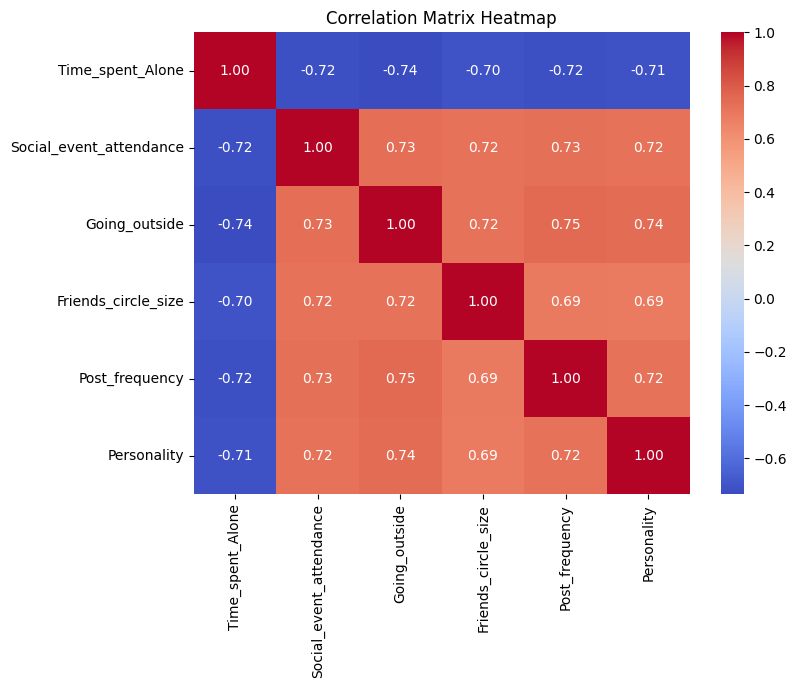

In [15]:
import seaborn as sns

# Compute correlation matrix for numerical columns and the target variable
corr_matrix = df_scaled[num_cols.tolist() + ['Personality']].corr()

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix Heatmap")
plt.show()

### Comments
- The correlation matrix shows strong negative correlations between time spent alone with other numerical features and the target variable
- The results are expected as people spending more time alone tend to have fewer friends, participate in fewer activities, and post fewer blogs
- The magnitude of correlations between numerical features and the target variable are alike

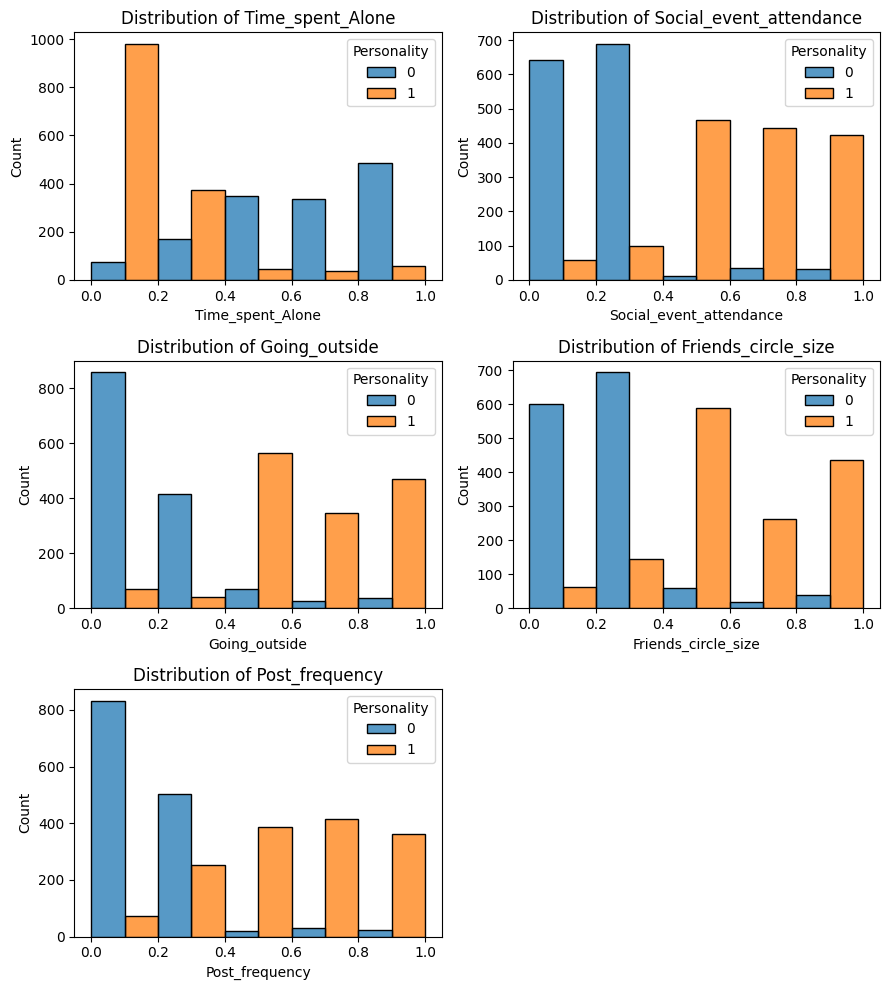

In [18]:
plt.figure(figsize=(9, 10))

for i, col in enumerate(num_cols):
    plt.subplot(3, 2, i + 1)
    sns.histplot(data=df_scaled, x=col, hue="Personality", multiple="dodge", edgecolor='black', bins=5)
    plt.title(f"Distribution of {col}")

plt.tight_layout()
plt.show()

The histogram grouped by personality plots confirm the correlation matrix results

# Machine Learning

## Train test split

In [19]:
from sklearn.model_selection import train_test_split

X = df_scaled.drop(columns=['Personality'])
y = df_scaled['Personality']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"Training set size: {X_train.shape[0]}")
print(f"Test set size: {X_test.shape[0]}\n")

Training set size: 2320
Test set size: 580



In [21]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

models = {
    "KNN": KNeighborsClassifier(n_neighbors=3),
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(max_depth=5, max_leaf_nodes=10),
    "Random Forest": RandomForestClassifier(n_estimators=100, max_depth=3, max_leaf_nodes=5)
}

Training KNN...

KNN Classification Report:

              precision    recall  f1-score   support

           0       0.90      0.93      0.91       278
           1       0.93      0.90      0.92       302

    accuracy                           0.91       580
   macro avg       0.91      0.91      0.91       580
weighted avg       0.91      0.91      0.91       580



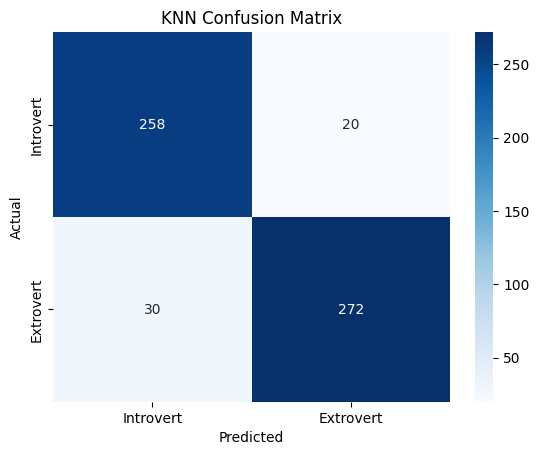


--------------------------------------------------------------------------------

Training Logistic Regression...

Logistic Regression Classification Report:

              precision    recall  f1-score   support

           0       0.91      0.93      0.92       278
           1       0.93      0.92      0.93       302

    accuracy                           0.92       580
   macro avg       0.92      0.92      0.92       580
weighted avg       0.92      0.92      0.92       580



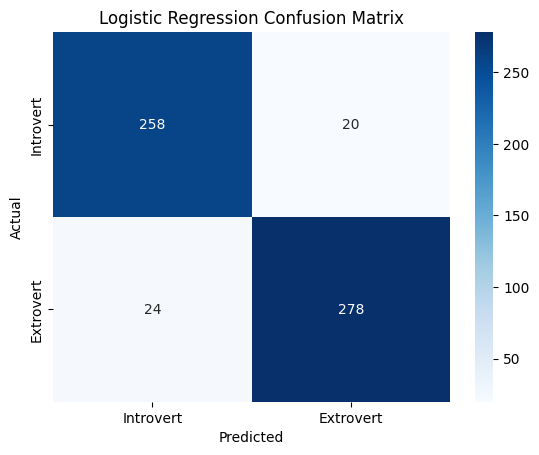


--------------------------------------------------------------------------------

Training Decision Tree...

Decision Tree Classification Report:

              precision    recall  f1-score   support

           0       0.92      0.94      0.93       278
           1       0.94      0.92      0.93       302

    accuracy                           0.93       580
   macro avg       0.93      0.93      0.93       580
weighted avg       0.93      0.93      0.93       580



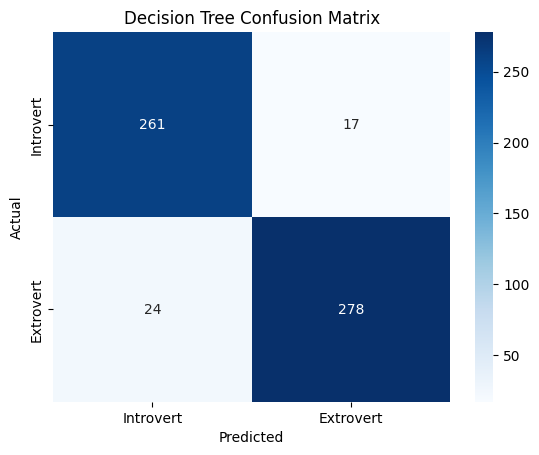


--------------------------------------------------------------------------------

Training Random Forest...

Random Forest Classification Report:

              precision    recall  f1-score   support

           0       0.92      0.94      0.93       278
           1       0.94      0.92      0.93       302

    accuracy                           0.93       580
   macro avg       0.93      0.93      0.93       580
weighted avg       0.93      0.93      0.93       580



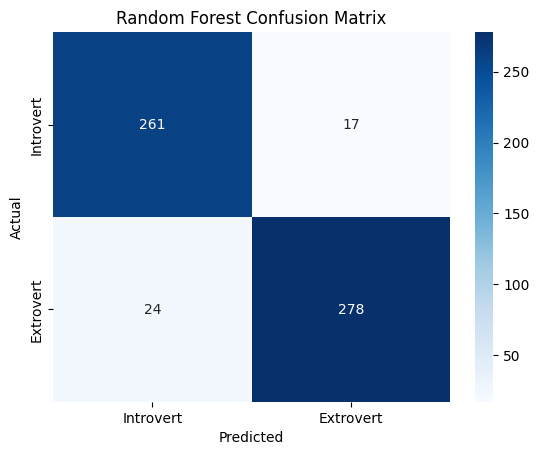


--------------------------------------------------------------------------------



In [25]:
from sklearn.metrics import classification_report, confusion_matrix

for model_name, model in models.items():
    print(f"Training {model_name}...")
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    
    print(f"\n{model_name} Classification Report:\n")
    print(classification_report(y_test, y_pred))
    
    conf_mat = confusion_matrix(y_test, y_pred)
    sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', xticklabels=['Introvert', 'Extrovert'], yticklabels=['Introvert', 'Extrovert'])
    plt.title(f"{model_name} Confusion Matrix")
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()
    print("\n" + "-"*80 + "\n")

### Comments
- All models achieve plausible results
- Decision tree and random forest perform a little better because they can recognize more complex classification border

# Feature engineering

## Define Alone_to_Social_Ratio and retrain models

In [26]:
df_new_feats = df_scaled.copy()

# Create new features based on existing ones
df_new_feats['Alone_to_Social_Ratio'] = df_new_feats['Time_spent_Alone'] / (df_new_feats['Social_event_attendance'] + 1)

# Drop old feautures
df_new_feats.drop(columns=['Time_spent_Alone', 'Social_event_attendance'], inplace=True)
df_new_feats.head()

,Stage_fear,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality,Alone_to_Social_Ratio
0,0,0.857143,0,0.866667,0.5,1,0.259740
1,1,0.000000,1,0.000000,0.3,0,0.818182
2,1,0.285714,1,0.333333,0.2,0,0.743802
3,0,1.000000,0,0.933333,0.8,1,0.000000
4,0,0.571429,0,0.533333,0.5,1,0.143541


In [27]:
X_new = df_new_feats.drop(columns=['Personality'])
X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(X_new, y, test_size=0.2, random_state=42)


Retrain models with new features...

Training KNN...

KNN Classification Report:

              precision    recall  f1-score   support

           0       0.90      0.92      0.91       278
           1       0.93      0.90      0.92       302

    accuracy                           0.91       580
   macro avg       0.91      0.91      0.91       580
weighted avg       0.91      0.91      0.91       580



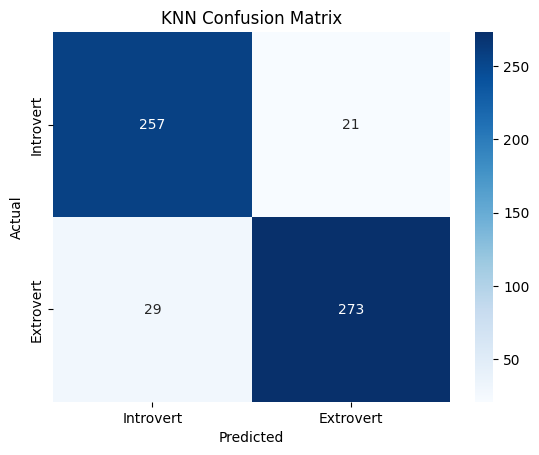


--------------------------------------------------------------------------------

Training Logistic Regression...

Logistic Regression Classification Report:

              precision    recall  f1-score   support

           0       0.92      0.94      0.93       278
           1       0.94      0.92      0.93       302

    accuracy                           0.93       580
   macro avg       0.93      0.93      0.93       580
weighted avg       0.93      0.93      0.93       580



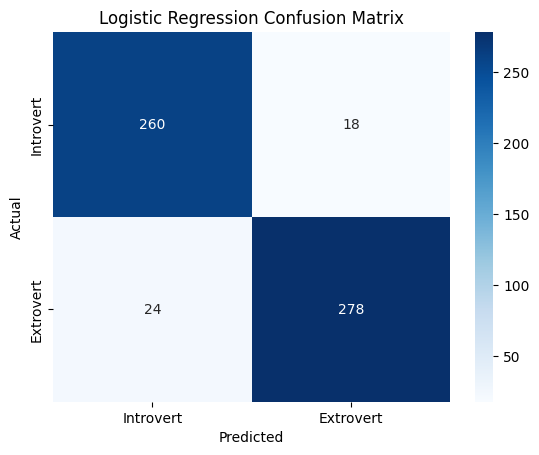


--------------------------------------------------------------------------------

Training Decision Tree...

Decision Tree Classification Report:

              precision    recall  f1-score   support

           0       0.91      0.94      0.92       278
           1       0.94      0.91      0.93       302

    accuracy                           0.93       580
   macro avg       0.93      0.93      0.93       580
weighted avg       0.93      0.93      0.93       580



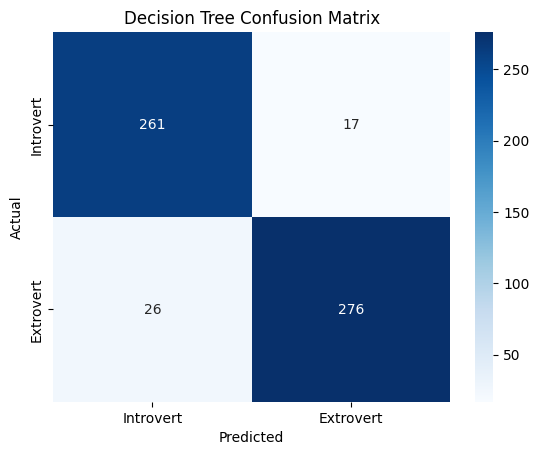


--------------------------------------------------------------------------------

Training Random Forest...

Random Forest Classification Report:

              precision    recall  f1-score   support

           0       0.92      0.94      0.93       278
           1       0.94      0.92      0.93       302

    accuracy                           0.93       580
   macro avg       0.93      0.93      0.93       580
weighted avg       0.93      0.93      0.93       580



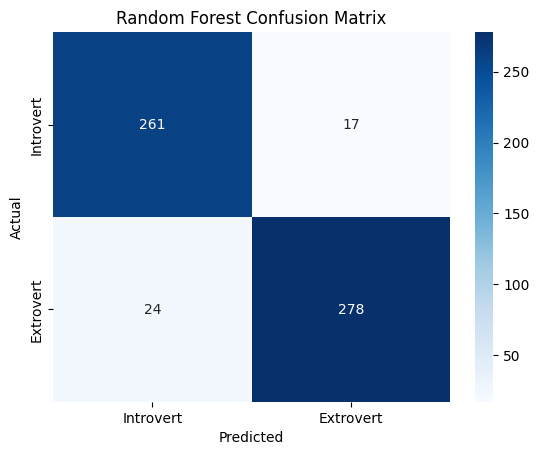


--------------------------------------------------------------------------------



In [29]:
print("Retrain models with new features...\n")
for model_name, model in models.items():
    print(f"Training {model_name}...")
    model.fit(X_train_new, y_train_new)
    
    y_pred = model.predict(X_test_new)
    
    print(f"\n{model_name} Classification Report:\n")
    print(classification_report(y_test_new, y_pred))
    
    conf_mat = confusion_matrix(y_test_new, y_pred)
    sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', xticklabels=['Introvert', 'Extrovert'], yticklabels=['Introvert', 'Extrovert'])
    plt.title(f"{model_name} Confusion Matrix")
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()
    print("\n" + "-"*80 + "\n")

## Define new boolean variable Prefers_online_expression and retrain models

In [33]:
df_new_bool = df_scaled.copy()

# Calculate medians
post_median = df_new_bool["Post_frequency"].median()
outside_median = df_new_bool["Going_outside"].median()

# Define feature
df_new_bool["Prefers_Online_Expression"] = (
    (df_new_bool["Post_frequency"] >= post_median) &
    (df_new_bool["Going_outside"] <= outside_median)
).astype(int)

# Drop old features
df_new_bool.drop(columns=["Post_frequency", "Going_outside"], inplace=True)
df_new_bool.head()

,Time_spent_Alone,Stage_fear,Social_event_attendance,Drained_after_socializing,Friends_circle_size,Personality,Prefers_Online_Expression
0,0.363636,0,0.4,0,0.866667,1,0
1,0.818182,1,0.0,1,0.000000,0,1
2,0.818182,1,0.1,1,0.333333,0,0
3,0.000000,0,0.6,0,0.933333,1,0
4,0.272727,0,0.9,0,0.533333,1,0


In [34]:
df_new_bool["Prefers_Online_Expression"].value_counts()

Prefers_Online_Expression
0    2629
1     271
Name: count, dtype: int64

In [35]:
X_new = df_new_bool.drop(columns=['Personality'])
X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(X_new, y, test_size=0.2, random_state=42)

Retrain models with new features...

Training KNN...

KNN Classification Report:

              precision    recall  f1-score   support

           0       0.91      0.91      0.91       278
           1       0.92      0.92      0.92       302

    accuracy                           0.91       580
   macro avg       0.91      0.91      0.91       580
weighted avg       0.91      0.91      0.91       580



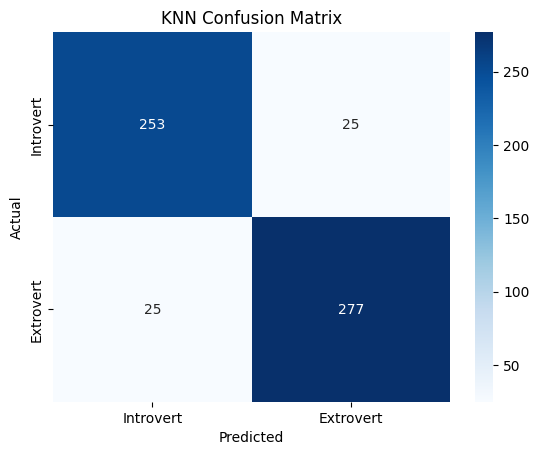


--------------------------------------------------------------------------------

Training Logistic Regression...

Logistic Regression Classification Report:

              precision    recall  f1-score   support

           0       0.91      0.92      0.92       278
           1       0.92      0.92      0.92       302

    accuracy                           0.92       580
   macro avg       0.92      0.92      0.92       580
weighted avg       0.92      0.92      0.92       580



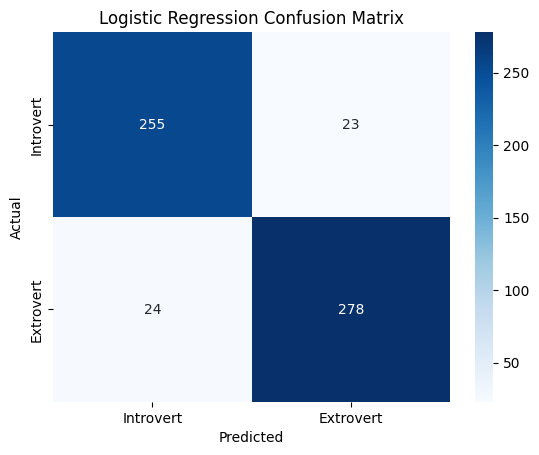


--------------------------------------------------------------------------------

Training Decision Tree...

Decision Tree Classification Report:

              precision    recall  f1-score   support

           0       0.92      0.94      0.93       278
           1       0.94      0.92      0.93       302

    accuracy                           0.93       580
   macro avg       0.93      0.93      0.93       580
weighted avg       0.93      0.93      0.93       580



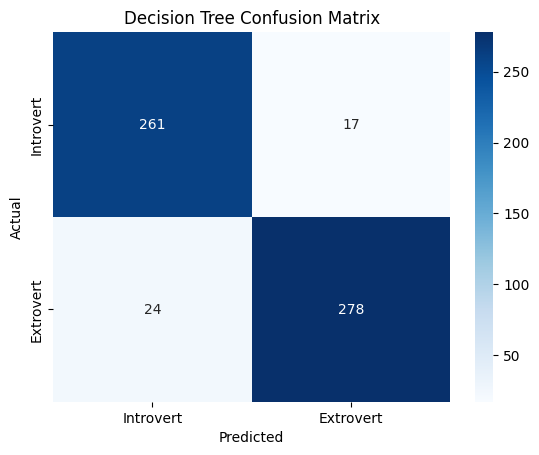


--------------------------------------------------------------------------------

Training Random Forest...

Random Forest Classification Report:

              precision    recall  f1-score   support

           0       0.92      0.94      0.93       278
           1       0.94      0.92      0.93       302

    accuracy                           0.93       580
   macro avg       0.93      0.93      0.93       580
weighted avg       0.93      0.93      0.93       580



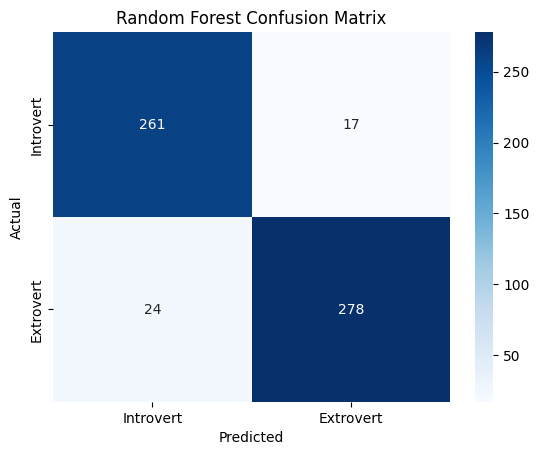


--------------------------------------------------------------------------------



In [36]:
print("Retrain models with new features...\n")
for model_name, model in models.items():
    print(f"Training {model_name}...")
    model.fit(X_train_new, y_train_new)
    
    y_pred = model.predict(X_test_new)
    
    print(f"\n{model_name} Classification Report:\n")
    print(classification_report(y_test_new, y_pred))
    
    conf_mat = confusion_matrix(y_test_new, y_pred)
    sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', xticklabels=['Introvert', 'Extrovert'], yticklabels=['Introvert', 'Extrovert'])
    plt.title(f"{model_name} Confusion Matrix")
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()
    print("\n" + "-"*80 + "\n")

### Comments
-Adding one engineered feature doesn't improve performance significantly because all of the original features are strongly correlated